# Κατηγοριοποίηση Iris με τον GaussianNB

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Accuracy:  0.97
Precision: 0.98
Recall:    0.94
F1-score:  0.96
F1-score:  0.96


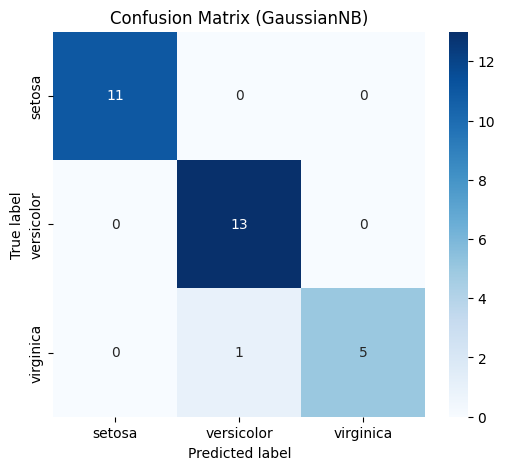

In [19]:
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# 1. Φόρτωση του dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Διαχωρισμός σε training και testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Εφαρμογή Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Πρόβλεψη στα δεδομένα testing
y_pred = model.predict(X_test)

# 5. Υπολογισμός και εκτύπωση μετρικών
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
fbeta = fbeta_score(y_test, y_pred, beta=1, average='macro')

print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")
print(f"F1-score:  {fbeta:.2f}")

# 6. Σχεδίαση Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (GaussianNB)')
plt.show()